# Predicting the concrete compressive strength:

**Context:**
Concrete is the most used material for construction in the world! There are some components that should be combined to make the concrete. These components can affect the compressive strength of the concrete. To obtain the real compressive strength of concrete (target labels in the dataset), an engineer needs to break the cylinder samples under the compression-testing machine. The failure load is divided by the cylinder's cross-section to obtain the compressive strength. Engineers use different kinds of concretes for different building purposes. For example, the strength of concrete used for residential buildings should not be lower than 2500 psi (17.2 MPa). Concrete is a material with high strength in compression, but low strength in tension. That is why engineers use reinforced concrete (usually with steel rebars) to build structures.

from: https://www.kaggle.com/datasets/sinamhd9/concrete-comprehensive-strength

**Objective**: Obtaining a prediction model to estimate the Concrete Compressive Strength based on the composition and age of the concrete.

## Data preparation and exploratory analysis:

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split

Downloading the dataset e checking the number of rows and columns:

In [852]:
df = pd.read_csv('Concrete_Data.csv')
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


**Description:**

**Concrete composition (Input Variables):**

    - Cement: kg in a m³ mixture 
    - Blast Furnace Slag: kg in a m³ mixture 
    - Fly Ash: kg in a m³ mixture 
    - Water: kg in a m³ mixture 
    - Superplasticizer: kg in a m³ mixture
    - Coarse Aggregate: kg in a m³ mixture
    - Fine Aggregate: kg in a m³ mixture 
    
**Concrete age (Input Variable):**

    - Age: Days
    
**Mechanical property of the concrete (Output Variable):**

    - Compressive strength: MPa

For this type of study, we did not remove duplicates, since it is usual to work with replicates when we intend to confirm the relationship between the characteristics of a material and a specific property.

In [4]:
df.duplicated().sum()

25

In [5]:
df.drop('Compressive strength', axis=1).duplicated().sum()

34

We can conclude that there are 34 replicates. And of the 34 replicates, 25 showed the same compression force value.

Checking the number of null cells and the format types of the variables:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Cement                1030 non-null   float64
 1   Blast Furnace Slag    1030 non-null   float64
 2   Fly Ash               1030 non-null   float64
 3   Water                 1030 non-null   float64
 4   Superplasticizer      1030 non-null   float64
 5   Coarse Aggregate      1030 non-null   float64
 6   Fine Aggregate        1030 non-null   float64
 7   Age                   1030 non-null   float64
 8   Compressive strength  1030 non-null   float64
dtypes: float64(9)
memory usage: 72.5 KB


### Descriptive analysis of the quantitative variable data:

In [7]:
df.describe().round(decimals=2)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Compressive strength
count,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00,1030.00
mean,281.17,73.90,54.19,181.57,6.20,972.92,773.58,45.66,35.82
std,104.51,86.28,64.00,21.36,5.97,77.75,80.18,63.17,16.71
min,102.00,0.00,0.00,121.75,0.00,801.00,594.00,1.00,2.33
25%,192.38,0.00,0.00,164.90,0.00,932.00,730.95,7.00,23.71
50%,272.90,22.00,0.00,185.00,6.35,968.00,779.51,28.00,34.44
75%,350.00,142.95,118.27,192.00,10.16,1029.40,824.00,56.00,46.14
max,540.00,359.40,200.10,247.00,32.20,1145.00,992.60,365.00,82.60


### Checking the data distribution of the target (compressive strength):

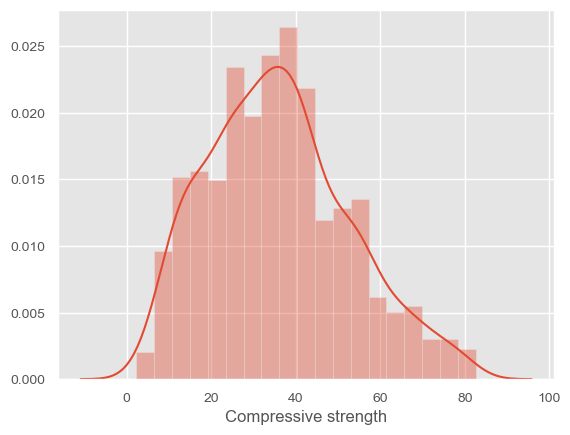

In [825]:
sns.distplot(df['Compressive strength']);

**Shapiro-Wilk normality test:**

In [827]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['Compressive strength'])
print(f"Estatistic: {stat}, p-value: {p_value}")

Estatistic: 0.9797907471656799, p-value: 9.01016136700683e-11


Although the histogram looks somewhat like a normal distribution, the target variable data is not normally distributed.

### Checking the data distribution and possible correlations of the quantitative variables.

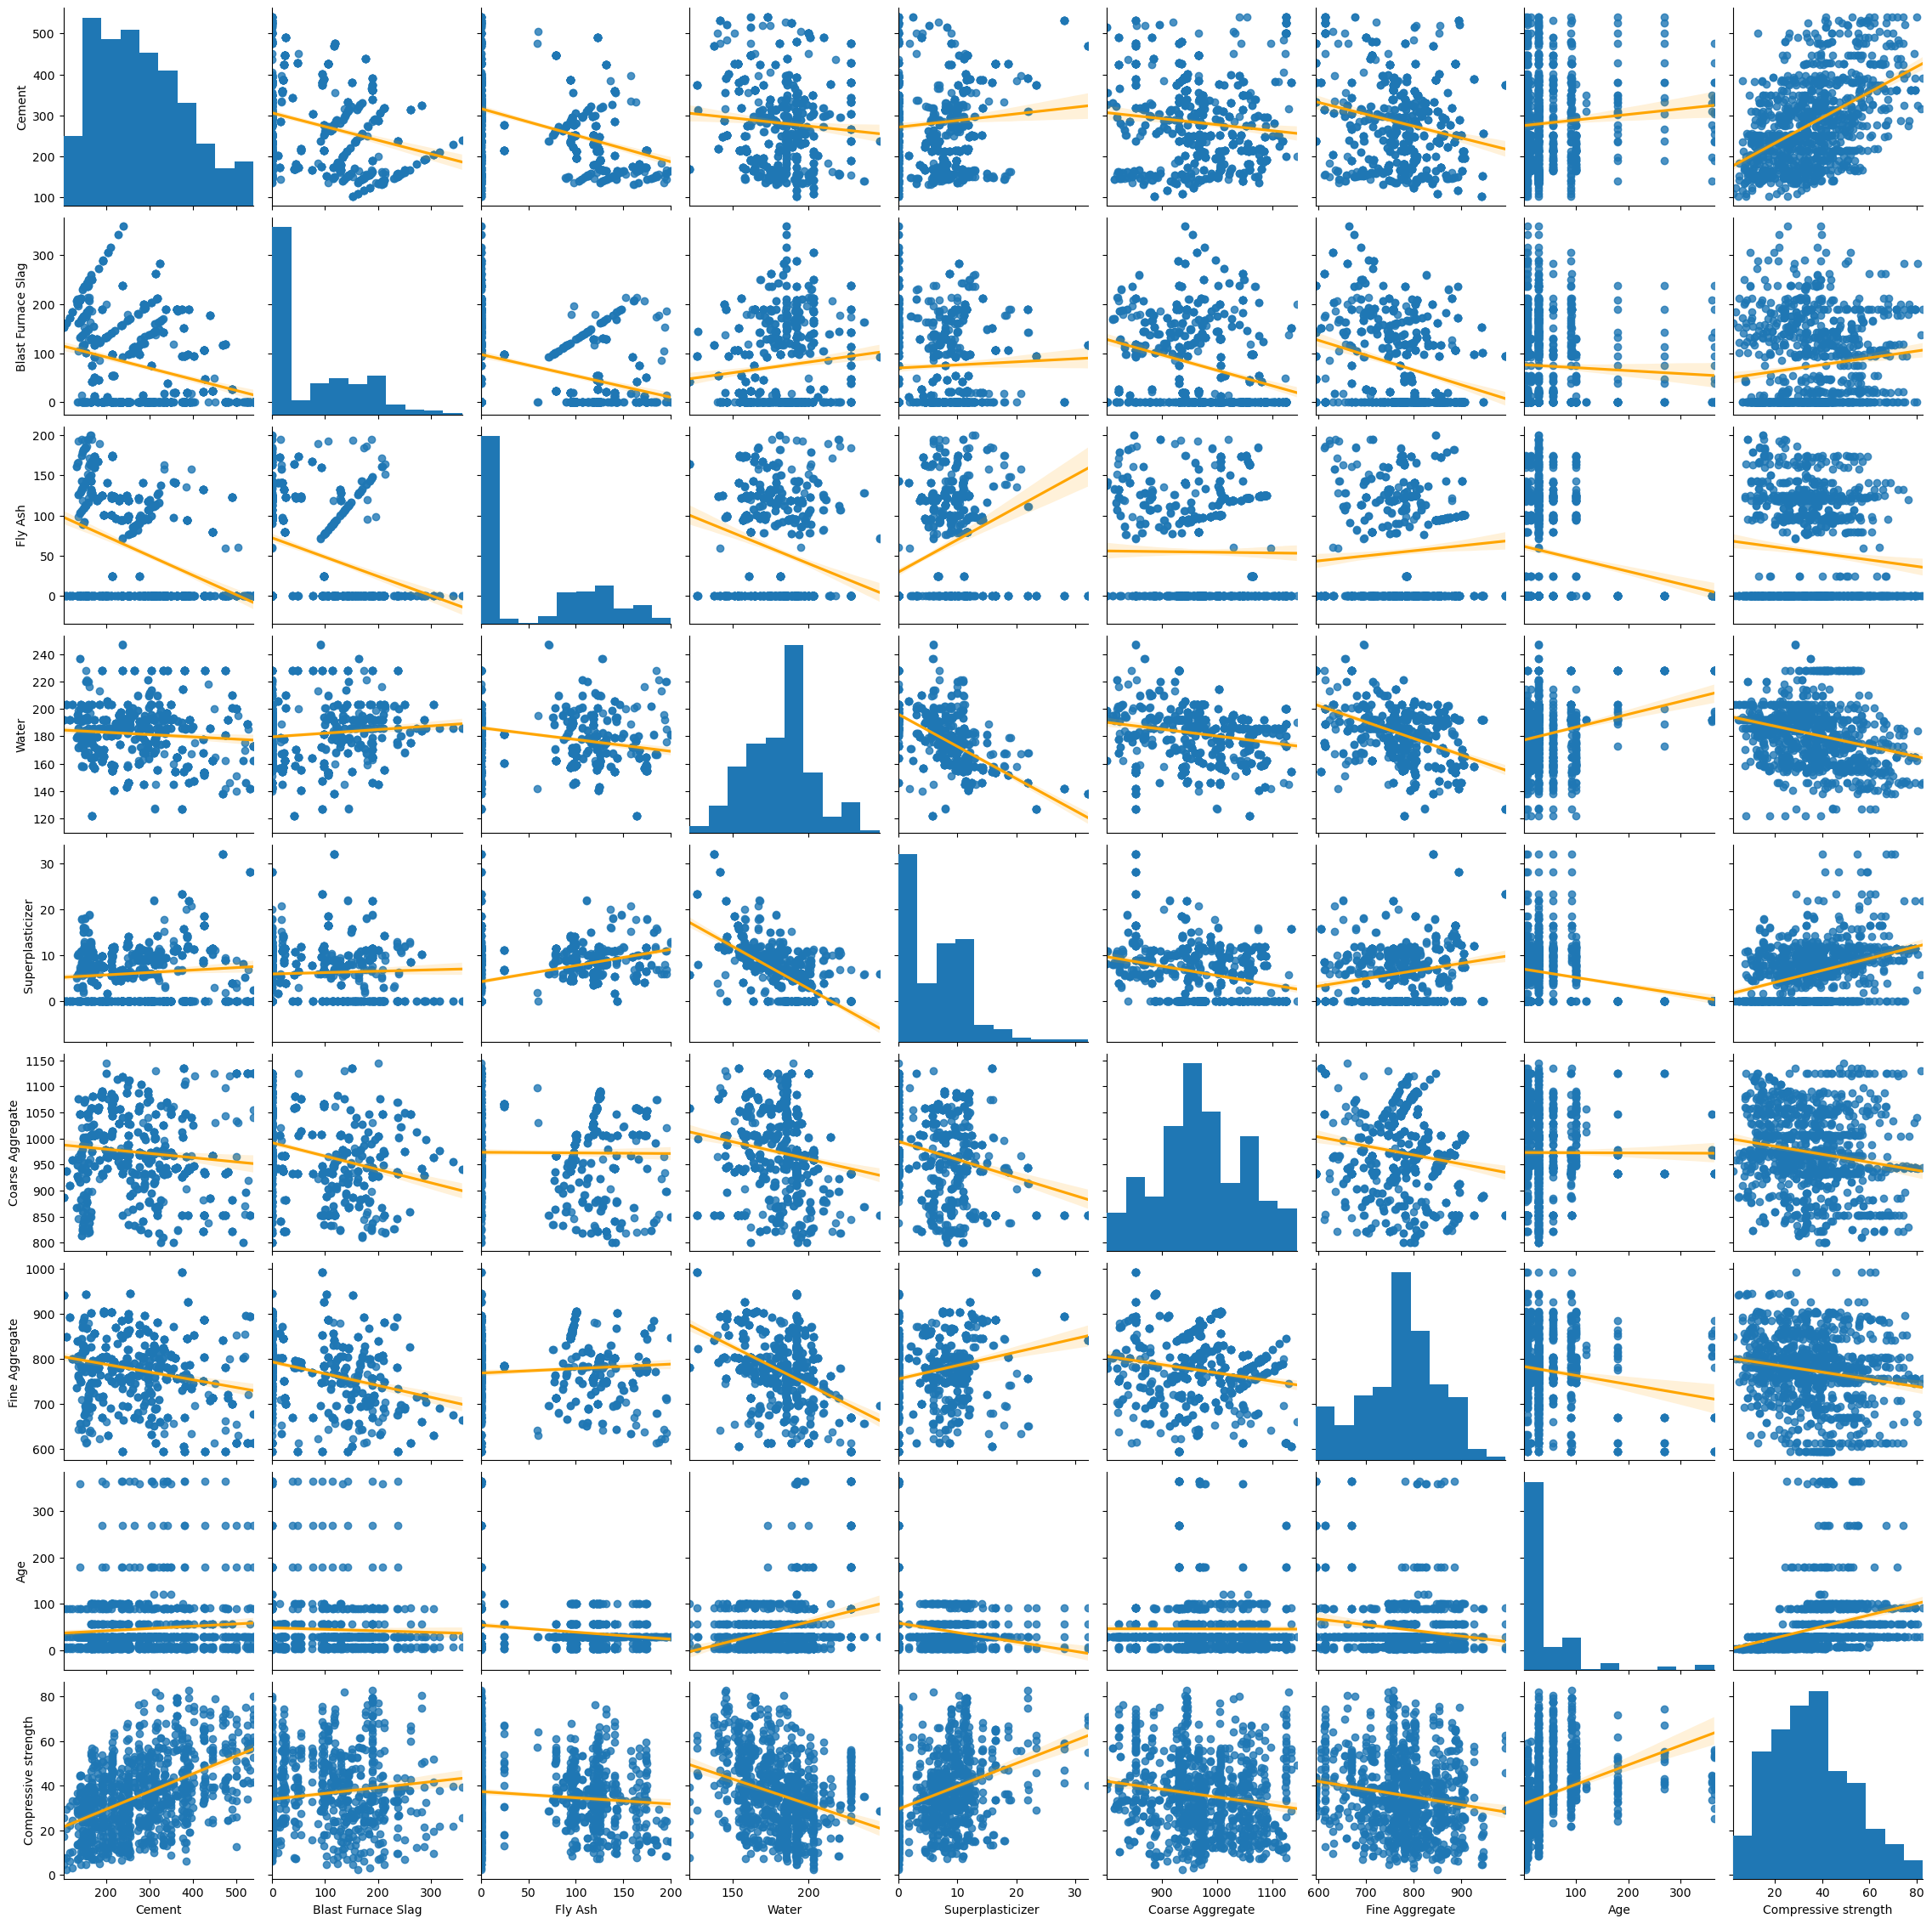

In [7]:
sns.pairplot(df, kind = 'reg', plot_kws = {'line_kws':{'color':'orange'}});

Observing the histograms in the graph above, we notice that most of the features do not appear to have a normal distribution. 

Therefore, to estimate the linear correlation coefficients between the variables, we chose to use the Spearman correlation coefficient instead of the Pearson coefficient.

#### SPEARMAN Correlation Coefficients for all quantitative variables:

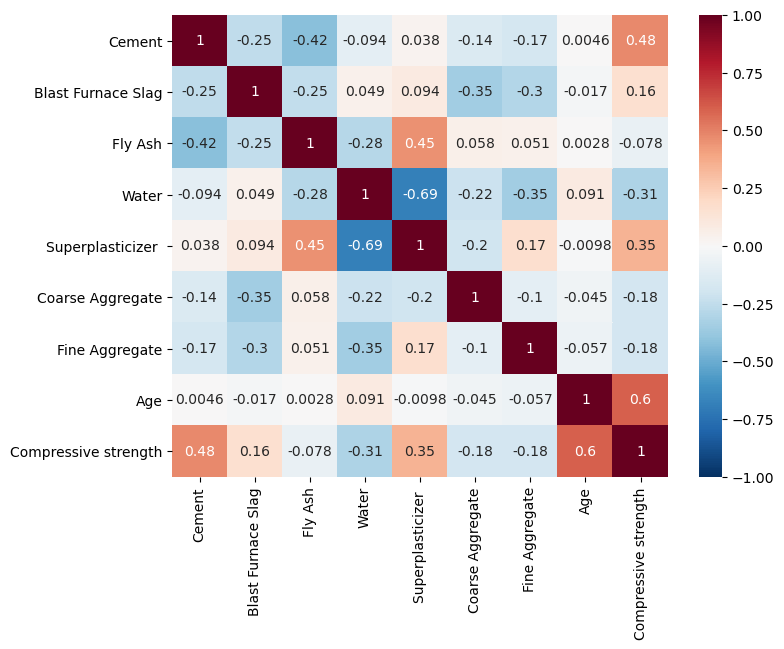

In [8]:
fig = plt.figure(figsize=(8,6))
sns.heatmap(df.corr(method='spearman'), 
            cmap='RdBu_r', 
            vmin=-1, vmax=1, 
            annot=True);

**Linear correlations:**

- Water and Superplasticizer: Moderate and negative Correlation (-0.69)
- Age and Compressive Strength: Moderate and positive Correlation (+ 0.60)
- Cement and Compressive Strength: Moderate and positive Correlation (+ 0.48)
- Fly ash and Superplasticizer: Moderate and positive Correlation (+ 0.45)
- Fly ash and Cement: Moderate and negative Correlation (- 0.42)

The remaining correlations are classified as weak or very weak.

Only the variables "Cement" and "Age" showed a linear correlation with the target variable classified as moderate. The variables "Water" and "Superplasticizer" presented a linear correlation with the target considered weak, while the remaining four variables presented a linear correlation with the target considered very weak (< 0.19).
One of the premises that must be met to use a linear prediction model is that the independent variables (features) present linear relationships with the dependent variable (target variable). Consequently, it is likely that we will not have good results if we choose to train a linear regression prediction model.

Therefore, we chose to carry out the study with the following models:
- Gradient Boosting Regressor
- Artificial Neural Networks.

### Transforming quantitative variables into categorical variables:

In order to improve the exploratory data analysis, the values of the quantitative variables were separated into different ranges.

Pivot tables were obtained in Excel to test different sizes of value ranges with the aim to avoid the presence of outliers. Furthermore, all categories must have at least 30 observations. 

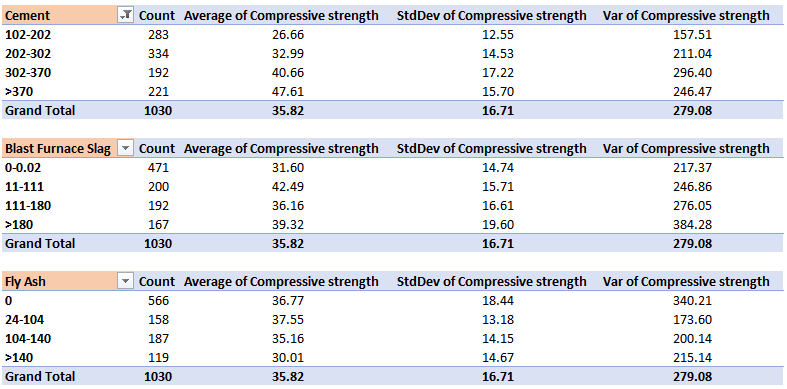
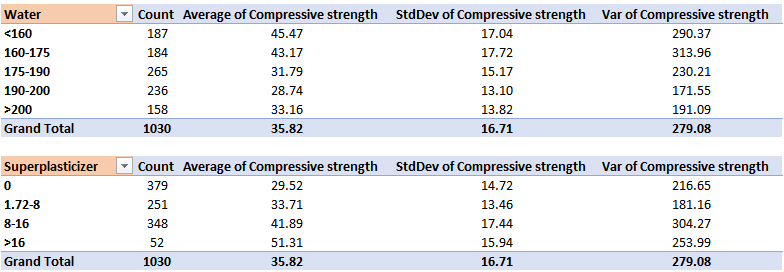
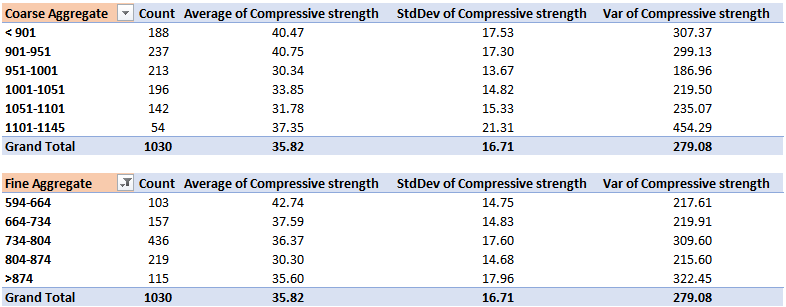
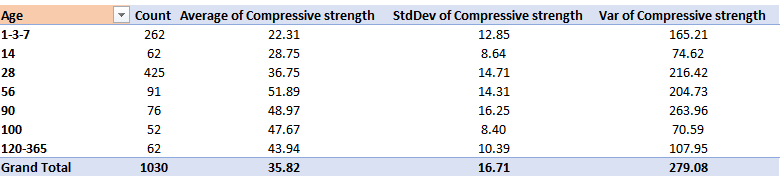

The values of the features were divided into different ranges (categories):

In [951]:
df_cat = pd.DataFrame(df['Compressive strength'])

categorization_rules = {'Cement': {'bins': [0, 202, 302, 370, 540.1],
                                   'labels': ['a [102-202]', 'b [202-302]', 'c [302-370]', 'd [370-540]']},
                        'Blast Furnace Slag': {'bins': [0, 11, 111, 180, 360.1],
                                               'labels': ['a [0-0.02]', 'b [11-111]', 'c [111-180]', 'd [180-360]']},
                        'Fly Ash': {'bins': [0, 24, 104, 140, 200.1],
                                    'labels': ['a [0]', 'b [24-104]', 'c [104-140]', 'd [140-200]']},
                        'Water': {'bins': [0, 160, 175, 190, 200, 247.1],
                                  'labels': ['a [120-160]', 'b [160-175]', 'c [175-190]', 'd [190-200]', 'e [200-247]']},
                        'Superplasticizer': {'bins': [0, 1.72, 10, 16, 32.1],
                                             'labels': ['a [0]', 'b [1.72-8]', 'c [8-16]', 'd [16-32]']},
                        'Coarse Aggregate': {'bins': [0, 901, 951, 1001, 1051, 1101, 1145.1],
                                             'labels': ['a [801-901]', 'b [901-951]', 'c [951-1001]', 'd [1001-1051]', 'e [1051-1101]', 'f [1101-1145]']},
                        'Fine Aggregate': {'bins': [0, 664, 734, 804, 874, 993.1],
                                           'labels': ['a [594-664]', 'b [664-734]', 'c [734-804]', 'd [804-874]', 'e [874-993]']},
                        'Age': {'bins': [0, 14, 28, 56, 90, 99, 101, 365.1],
                                'labels': ['a [1-3-7]', 'b [14]', 'c [28]', 'd [56]', 'e [90]', 'f [100]', 'g [120-365]']}}

for column, rules in categorization_rules.items():
    df_cat[column] = pd.cut(df[column], bins=rules['bins'], labels=rules['labels'], right=False)

df_cat

,Compressive strength,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,79.99,d [370-540],a [0-0.02],a [0],b [160-175],b [1.72-8],d [1001-1051],b [664-734],c [28]
1,61.89,d [370-540],a [0-0.02],a [0],b [160-175],b [1.72-8],e [1051-1101],b [664-734],c [28]
2,40.27,c [302-370],c [111-180],a [0],e [200-247],a [0],b [901-951],a [594-664],g [120-365]
3,41.05,c [302-370],c [111-180],a [0],e [200-247],a [0],b [901-951],a [594-664],g [120-365]
4,44.30,a [102-202],c [111-180],a [0],d [190-200],a [0],c [951-1001],d [804-874],g [120-365]
...,...,...,...,...,...,...,...,...,...
1025,44.28,b [202-302],c [111-180],b [24-104],c [175-190],b [1.72-8],a [801-901],c [734-804],c [28]
1026,31.18,c [302-370],a [0-0.02],c [104-140],d [190-200],c [8-16],a [801-901],d [804-874],c [28]
1027,23.70,a [102-202],c [111-180],c [104-140],d [190-200],b [1.72-8],a [801-901],c [734-804],c [28]
1028,32.77,a [102-202],d [180-360],a [0],c [175-190],c [8-16],c [951-1001],c [734-804],c [28]


The "df_cat" table was exported as a CSV file with the aim of exploring this data graphically in the "Power BI" software.

In [923]:
df_cat.to_csv('Concrete_2.csv', index=True)

In [932]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   target                1030 non-null   float64 
 1   Cement                1030 non-null   category
 2   Blast Furnace Slag    1030 non-null   category
 3   Fly Ash               1029 non-null   category
 4   Water                 1030 non-null   category
 5   Superplasticizer      1025 non-null   category
 6   Coarse Aggregate      1030 non-null   category
 7   Fine Aggregate        1030 non-null   category
 8   Age                   1030 non-null   category
 9   Compressive strength  1030 non-null   category
dtypes: category(9), float64(1)
memory usage: 19.2 KB


### ANOVA test:

Since the means of several samples follow a normal distribution (Central Limit Theorem), we can use the Anova Test to check whether the ranges of values (variable categories) have different Compressive strength means.

In [133]:
from scipy.stats import f_oneway

In [952]:
vars = df_cat.drop('Compressive strength', axis=1).columns
df_aux = df_cat.copy() 

In [953]:
Anova_test = []
feat_name = []

for var in vars: 
    
    groups = df_aux.groupby(var)['Compressive strength'].apply(list)

    feat_name.append(var)
    
    anova_test = f_oneway(*groups)
    Anova_test.append(anova_test.pvalue)
    
df_anova = pd.DataFrame(list(zip(feat_name, Anova_test)),columns=['Feature','p-value']) 
df_anova

,Feature,p-value
0,Cement,1.738557e-53
1,Blast Furnace Slag,7.432412e-16
2,Fly Ash,5.306372e-04
3,Water,4.134811e-37
4,Superplasticizer,2.042850e-29
5,Coarse Aggregate,4.154316e-14
6,Fine Aggregate,4.662681e-09
7,Age,8.047699e-91


All variables presented p-values lower than 0.05, which means that the mean compressive strength values are different between the categories.

### Checking for outliers and extreme outliers:


Identifying an outlier:

    - lower_bound = Q1 - 1.5 * IQR
    
    - upper_bound = Q3 + 1.5 * IQR

Identifying an extreme outlier:

    - lower_bound_extreme = Q1 - 3 * IQR
    
    - upper_bound_extreme = Q3 + 3 * IQR
    
Where, Q1 is the first quartile (25%), Q3 is the third quartile (75%) and IQR is the interquartile range.

We consider that, if the outliers are not extreme, we can tolerate a proportion of up to 5% of outliers (percentage of outliers in relation to the total observations).

In [954]:
# Defining the "outliers" and "extreme outliers" functions to later insert into the "groupby" function argument.

def lower_bound(x):
    Q1 = x.quantile(0.25)
    IQR = x.quantile(0.75) - Q1
    lower_bound = Q1 - 1.5 * IQR
    return lower_bound

def upper_bound(x):
    Q3 = x.quantile(0.75)
    IQR = Q3 - x.quantile(0.25)
    upper_bound = Q3 + 1.5 * IQR
    return upper_bound

def lower_bound_extreme(x):
    Q1 = x.quantile(0.25)
    IQR = x.quantile(0.75) - Q1
    lower_bound_extreme = Q1 - 3 * IQR
    return lower_bound_extreme

def upper_bound_extreme(x):
    Q3 = x.quantile(0.75)
    IQR = Q3 - x.quantile(0.25)
    upper_bound_extreme = Q3 + 3 * IQR
    return upper_bound_extreme

# Obtaining the number of observations, number of outliers, number of extreme outliers and proportion of outliers (%):

tables = []
feat_name = []

for var in vars:          # for all dependent variables (loop)
    
    df_ = df_aux.groupby(var).agg({'Compressive strength':[lower_bound, upper_bound, lower_bound_extreme, upper_bound_extreme,'mean','std']})    
    df_.columns = df_.columns.droplevel(0)

    df_all = df_aux[[var,'Compressive strength']]
    df_2 = pd.merge(df_all, df_, on= var, how='left')
    df_2['Outlier'] = ((df_2['Compressive strength'] < df_2['lower_bound']) | (df_2['Compressive strength'] > df_2['upper_bound'])).astype(int)
    df_2['Outlier_extreme'] = ((df_2['Compressive strength'] < df_2['lower_bound_extreme']) | (df_2['Compressive strength'] > df_2['upper_bound_extreme'])).astype(int)    

    df_3 = df_2.groupby(var).agg({'Outlier':'sum','Outlier_extreme':'sum','Compressive strength':'count'})
    df_3 = df_3.rename(columns={'Compressive strength': 'Observations'})
    df_3['Outlier_ratio%'] = 100*(df_3['Outlier']/df_3['Observations'])
    
    feat_name.append(var)
    tables.append(df_3)

df_outliers = pd.concat(tables, keys=feat_name)

In [955]:
def color_negative_red(val):
    color = 'red' if val != 0 else 'black'
    return 'color: %s' % color

df_outliers.style.applymap(color_negative_red) 

The maximum proportion of outliers obtained was 3.2 % in the range of 120-365 (days) of the "Age" variable.

There are no extreme outliers.

Therefore, we can calculate the Compressive Srength means and their confidence intervals without the need to remove any outliers.

### Obtaining the Confidence Intervals for the Compression strength Means:

In [124]:
from scipy.stats import norm

In [956]:
# Creating a pivot table with the mean values and their confidence intervals:

tables = []
feat_name = []

for var in vars:    
        
    df2 = df_aux.pivot_table(values='Compressive strength',
                             index=var,
                             aggfunc=['count', 'mean', 'std'])
    
    df2.columns = ['Count', 'Mean', 'Std']
    
    feat_name.append(var)
    tables.append(df2)

df_pivot = pd.concat(tables, keys=feat_name)

conf_level = 0.95
z_score_value = norm.ppf(0.5 + conf_level / 2)

df_pivot['CI Lower'] = df_pivot['Mean'] - z_score_value * (df_pivot['Std'] / np.sqrt(df_pivot['Count']))
df_pivot['CI Upper'] = df_pivot['Mean'] + z_score_value * (df_pivot['Std'] / np.sqrt(df_pivot['Count']))

to_drop = ['Count','Std']
df_pivot = df_pivot.drop(to_drop, axis=1).round(decimals=0)   
df_pivot.rename_axis(['Variable', 'Group'],inplace=True)               

df_pivot               

Mean  CI Lower  CI Upper
Variable           Group                                  
Cement             a [102-202]    27.0      25.0      28.0
                   b [202-302]    33.0      31.0      35.0
                   c [302-370]    41.0      38.0      43.0
                   d [370-540]    48.0      46.0      50.0
Blast Furnace Slag a [0-0.02]     32.0      30.0      33.0
                   b [11-111]     42.0      40.0      45.0
                   c [111-180]    36.0      33.0      38.0
                   d [180-360]    40.0      37.0      43.0
Fly Ash            a [0]          37.0      35.0      38.0
                   b [24-104]     38.0      35.0      40.0
                   c [104-140]    35.0      33.0      37.0
                   d [140-200]    30.0      27.0      33.0
Water              a [120-160]    45.0      43.0      48.0
                   b [160-175]    43.0      41.0      46.0
                   c [175-190]    32.0      30.0      34.0
                   d [190-200]    28.0      27.0      30.0
                   e [200-247]    33.0      31.0      35.0
Superplasticizer   a [0]          30.0      28.0      31.0
                   b [1.72-8]     36.0      34.0      37.0
                   c [8-16]       43.0      41.0      45.0
                   d [16-32]      49.0      44.0      54.0
Coarse Aggregate   a [801-901]    40.0      38.0      43.0
                   b [901-951]    41.0      39.0      43.0
                   c [951-1001]   30.0      28.0      32.0
                   d [1001-1051]  34.0      32.0      36.0
                   e [1051-1101]  32.0      29.0      34.0
                   f [1101-1145]  37.0      32.0      43.0
Fine Aggregate     a [594-664]    43.0      40.0      46.0
                   b [664-734]    38.0      35.0      40.0
                   c [734-804]    36.0      35.0      38.0
                   d [804-874]    30.0      28.0      32.0
                   e [874-993]    36.0      32.0      39.0
Age                a [1-3-7]      22.0      21.0      24.0
                   b [14]         29.0      27.0      31.0
                   c [28]         37.0      35.0      38.0
                   d [56]         52.0      49.0      55.0
                   e [90]         49.0      45.0      53.0
                   f [100]        48.0      45.0      50.0
                   g [120-365]    44.0      41.0      47.0

### Obtaining a bar graph with the mean compressive strength values and the respective confidence intervals:

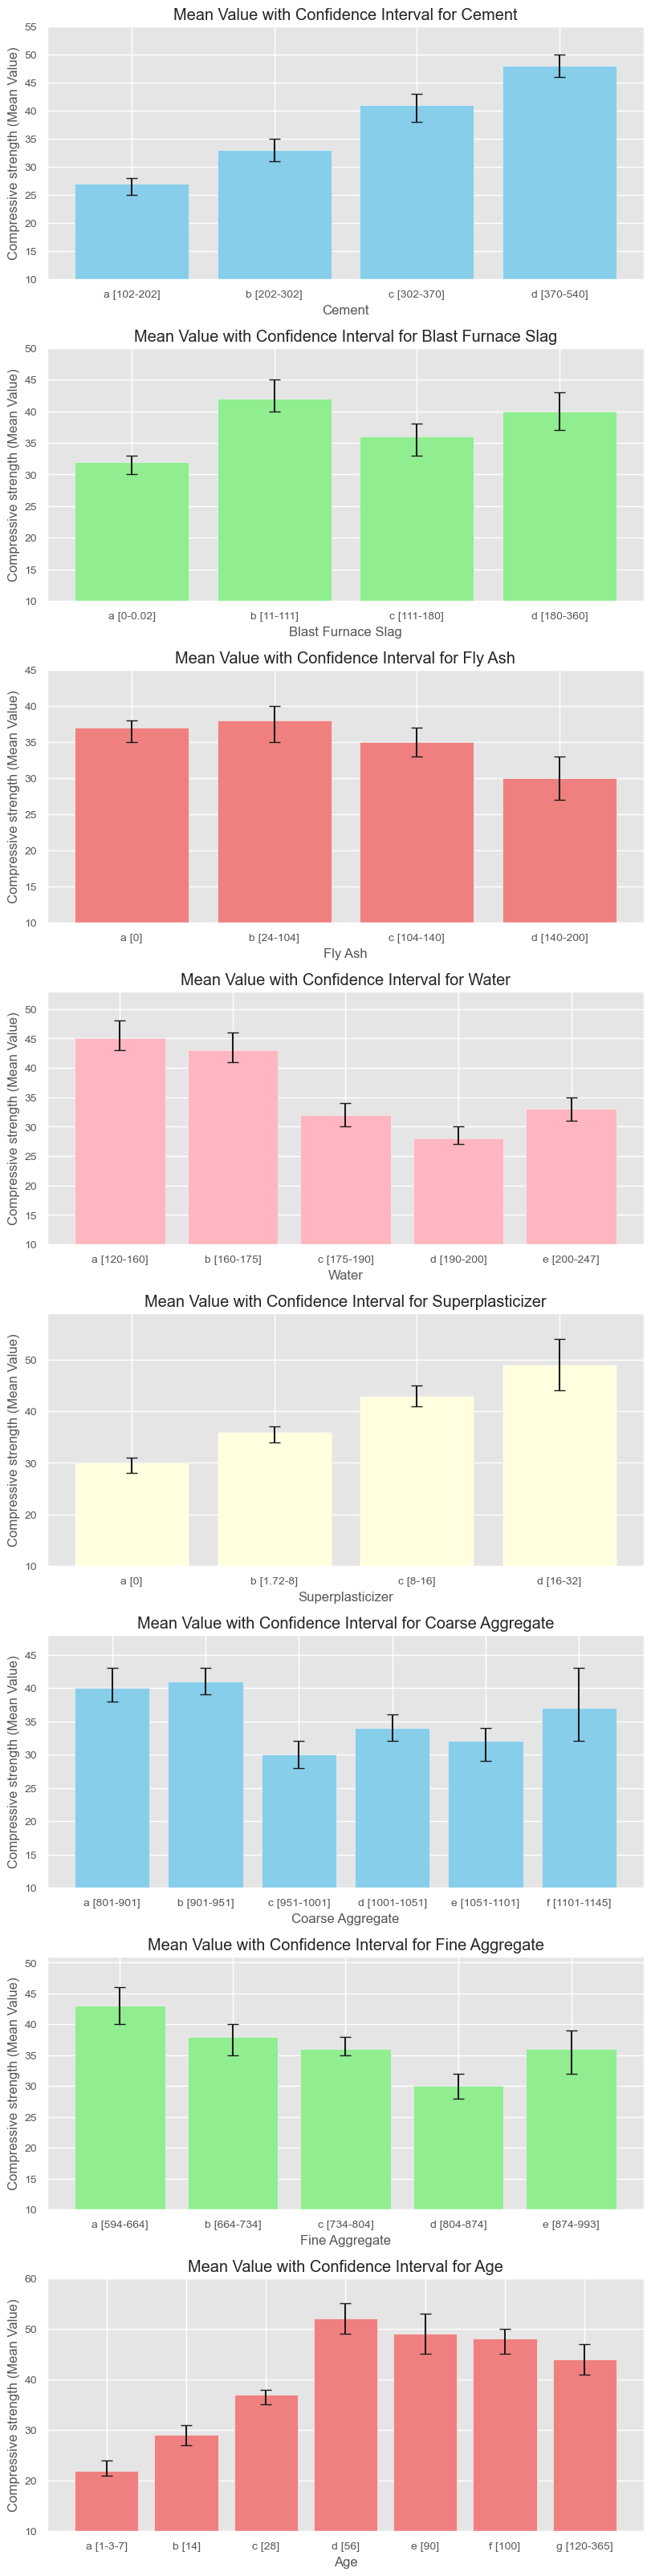

In [940]:
n = len(vars)
fig, axes = plt.subplots(n, 1, figsize=(8, 4 * n), constrained_layout=True)
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightyellow']

for i, var in enumerate(vars):

    pivot_ = df_pivot.loc[var]
    categories = list(pivot_.index.astype(str))
    num = len(pivot_['CI Lower'])
    means = np.array(pivot_['Mean']).reshape(num,)
    ci_lower = np.array(pivot_['CI Lower'])
    ci_upper = np.array(pivot_['CI Upper'])

    errors = [means - ci_lower, ci_upper - means]
    
    axes[i].bar(categories, means, yerr=errors, capsize=5, color=colors[i % len(colors)])
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Compressive strength (Mean Value)')
    axes[i].set_title(f'Mean Value with Confidence Interval for {var}')
    axes[i].set_ylim(10, max(ci_upper + 5)) 
plt.show()

**Observing the confidence intervals in the df_pivot tables and box-plot graphs, we can infer the following conclusions (with 95% confidence):**

**Cement:** All categories presented different mean compressive strengths. The greater the amount of cement, the higher the mean compressive strength of the concrete;

**Blast Furnace Slag:** The mean compressive strength of the concrete is lower when the "Blast Furnace Slag" concentration is close to zero (range 0-0.02 kg/m³);

**Fly Ash:** Compressive strength reduces when the concrete composition contains more than 140 kg/m³ of fly ash;

**Water:** Compressive strength reduces considerably when the concrete composition contains more than 175 kg/m³ of water;

**Superplasticizer:** All categories have different mean compressive strengths. The greater the amount of superplastcizer, the greater the mean compressive strength of the concrete;

**Coarse Aggregate:** The concentration range from 801 to 951 kg/m³ presented a higher mean compressive strength than the range from 951 to 1101 kg/m³. 

**Fine Aggregate:** The concentration ranges from 594 to 664 kg/m³ and from 804 to 874 kg/m³ presented a higher average compressive strength value than the other concentration ranges. The range with the highest concentration of Fine Aggregate (874 to 993 kg/m³) presented the lowest compressive strength value.

**Age:** The value of the mean compressive strength increases as the age of the concrete also increases, reaching a maximum plateau at 56 days.

### **Obtaining the percentage of observations with "unacceptable" compressive strength in each category:**

The strength of concrete used for residential buildings should not be lower than 17.2 MPa. 

Therefore, the target variable was categorized in binary form, where observations with a compressive strength value lower than 17.2 MPa were classified as "Unacceptable".

The column graphs below were obtained from the "Power BI" software and show the percentage of observations classified as “Unacceptable” in the variable categories.

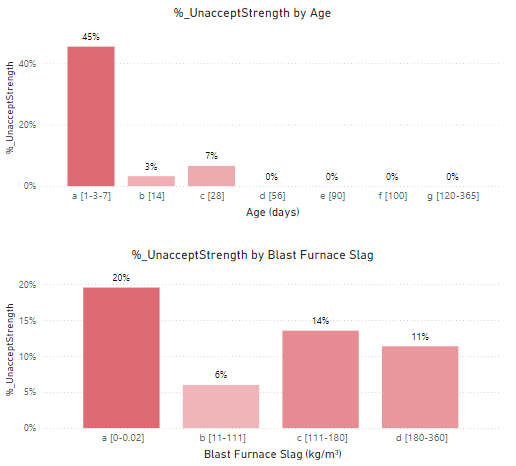
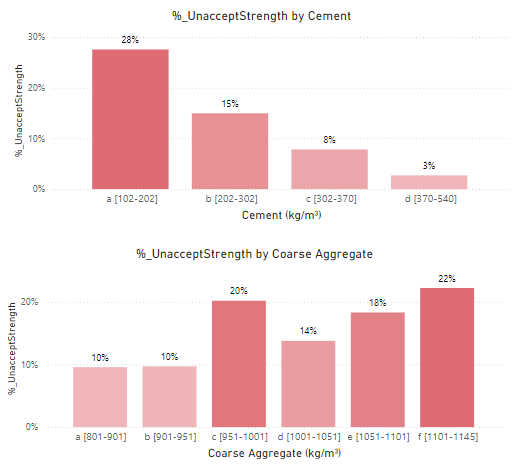
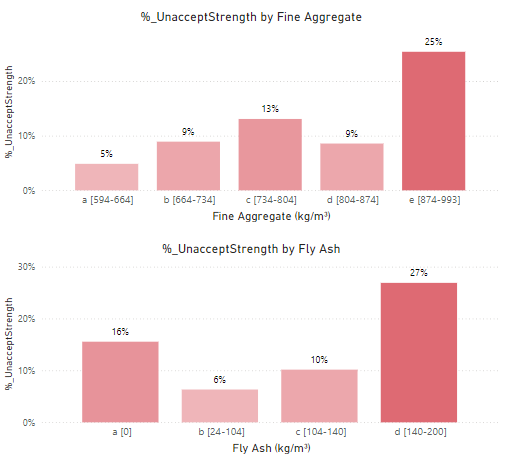
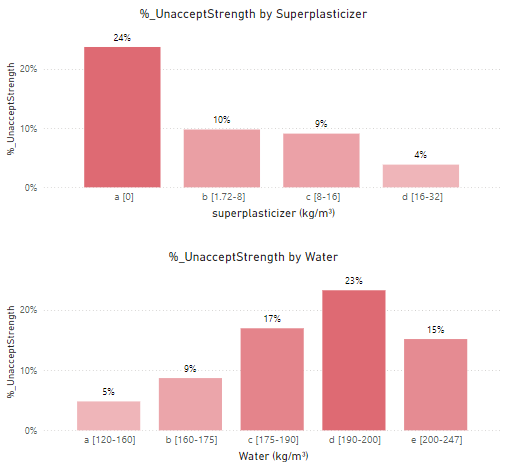

It is possible to identify the ranges of features that have a greater tendency to present an "ACCEPTABLE" compressive strength, that is, **greater than 17.2 MPa**:

Age (days) > 14

11 < Blast Furnace Slag (kg/m³) < 111

302 < Cement (kg/m³) < 540

801 < Coarse Aggregate (kg/m³) < 951

594 < Fine Aggregate (kg/m³) < 874

Fly Ash (kg/m³) < 140

Superplasticizer (kg/m³) > 1.72

Water (kg/m³) < 175

### Combinations of features and compressive strength:

The graph below shows some combinations of concrete features that presented a high percentage of UNACCEPTABLE compressive strength (below 17.2 MPa).

Where: 

Age (a): 1, 3 and 7 days

Cement (a): 102 to 202 kg/m³

Water (d): 190 to 200 kg/m³

Superplasticizer (a): 0 kg/m³

Fine Aggregate (e): 874 to 993 kg/m³

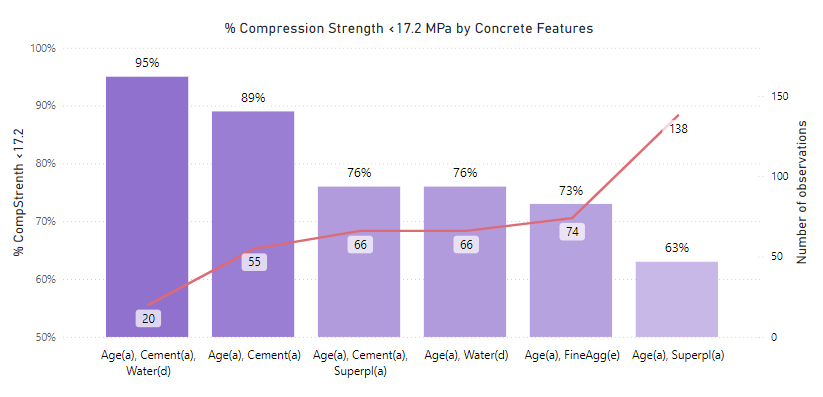

## Prediction Models 

### Preparing the data for training:

Defining the features set (x) and the target (y):

In [733]:
y = df['Compressive strength']

x = df.drop('Compressive strength', axis=1)

Dividing into training, test and validation:

In [734]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size= 0.30,
                                                    random_state= 42) 

x_train_, x_valid, y_train_, y_valid = train_test_split(x_train, y_train, 
                                                    test_size= 0.20,
                                                    random_state= 42) 

### Gradient Boosting Regressor:

The Bayesian optimization technique was used to find the best hyperparameters for the model.

In [732]:
from sklearn.ensemble import GradientBoostingRegressor

In [735]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
import sys
from hyperopt import space_eval

Defining the function structure of the prediction model:

In [736]:
def train_boosting (estimators, lean_rate, min_leaf, sample, max_dp): 
    

    model_gbr = GradientBoostingRegressor(n_estimators = estimators, 
                                           learning_rate = lean_rate,
                                           min_samples_leaf = min_leaf,
                                           subsample = sample,           
                                           max_depth = max_dp,
                                           validation_fraction=0.3,
                                           random_state = 42)
                                            
    return model_gbr

Definition of the hyperparametric space:

In [737]:
est = np.arange(50, 110, 10) 

leanrt = np.arange(0.10, 1.0, 0.10).round(decimals=2) 

min_leaf = [5, 10 , 20, 50, 100] 

samp = np.arange(0.30, 1.0, 0.20).round(decimals=2) 
 
maxdp = np.arange(3, 11, 1) 


# Defining the dictionary of hyperparameters: 
param_grid = dict(estimators=est,
                  lean_rate=leanrt,
                  min_leaf = min_leaf,
                  sample =samp,
                  max_dp = maxdp)

In [738]:
bo_space = {'estimators': hp.choice('estimators', param_grid['estimators']),
            'lean_rate': hp.choice('lean_rate', param_grid['lean_rate']),
            'min_leaf': hp.choice('min_leaf', param_grid['min_leaf']),
            'sample': hp.choice('sample', param_grid['sample']),
            'max_dp': hp.choice('max_dp', param_grid['max_dp'])}

In [739]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import math
from math import sqrt

Defining the function that will be optimized:

The metric used to find the best hyperparameters was the Determination Coefficient (R²)

In [740]:
def bo_gbr(param):   

    print ('tested_hyperparameters: ', param)
    model_bo= train_boosting(estimators=param['estimators'], 
                                lean_rate=param['lean_rate'],
                                min_leaf=param['min_leaf'],
                                sample =param['sample'],
                                max_dp=param['max_dp'])  
    
    model_bo.fit(x_train_, y_train_)    
      
    y_pred_train = model_bo.predict(x_train_)
    y_pred_valid = model_bo.predict(x_valid)
            
    r2_train = r2_score(y_train_, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred_valid)   
    r2_Difference = (r2_train - r2_valid)
    
    D_r = math.sqrt((r2_valid - 1)**2 + (r2_Difference - 0)**2)
    
    print('r2_train :',r2_train, 'r2_valid :',r2_valid)
    
    return {'loss': D_r,'status': STATUS_OK}

Defining the parameters of the "fmin" optimization function:

In [324]:
trials = Trials()                  
bo_search = fmin(fn= bo_gbr,       
                 space= bo_space,  
                 algo=tpe.suggest, 
                 max_evals=200,     
                 trials=trials)

tested_hyperparameters:                                                                                                
{'estimators': 100, 'lean_rate': 0.9, 'max_dp': 3, 'min_leaf': 5, 'sample': 0.3}                                       
r2_train :                                                                                                             
0.8568083002363795                                                                                                     
r2_valid :                                                                                                             
0.7280512622525366                                                                                                     
tested_hyperparameters:                                                                                                
{'estimators': 100, 'lean_rate': 0.4, 'max_dp': 10, 'min_leaf': 50, 'sample': 0.5}                                     
r2_train :                              

Obtaining the best hyperparameters:

In [325]:
bo_better_hp = space_eval(bo_space, bo_search)
print('Better hyperparameters: ', bo_better_hp)

Better hyperparameters:  {'estimators': 80, 'lean_rate': 0.3, 'max_dp': 6, 'min_leaf': 10, 'sample': 0.5}


Fitting the chosen model (best hyperparameters):

In [741]:
model_gbr = GradientBoostingRegressor(n_estimators = 80, 
                                        learning_rate = 0.3,
                                        min_samples_leaf = 10,
                                        subsample = 0.5,           
                                        max_depth = 6,
                                        validation_fraction=0.3,
                                        random_state = 42) 

model_gbr.fit(x_train_, y_train_)

GradientBoostingRegressor(learning_rate=0.3, max_depth=6, min_samples_leaf=10,
                          n_estimators=80, random_state=42, subsample=0.5,
                          validation_fraction=0.3)

Function to obtain the performance with the testing and training datasets:

In [762]:
def performance_reg (model, x_train, y_train, x_test, y_test, y_scaler=None):
    
    if y_scaler is not None:
        y_pred_train = y_scaler.inverse_transform(model.predict(x_train))
        y_pred_test  = y_scaler.inverse_transform(model.predict(x_test))
        
    else:
        y_pred_train = model.predict(x_train)
        y_pred_test =model.predict(x_test)

    r2_train = r2_score(y_train, y_pred_train)
    r2_test =  r2_score(y_test, y_pred_test)

    rmse_train = sqrt(mean_squared_error(y_train, y_pred_train))
    rmse_test  = sqrt(mean_squared_error(y_test,  y_pred_test))
    
    df_per = pd.DataFrame({'Train':[r2_train, rmse_train],
                            'Test':[r2_test, rmse_test]},
                            index=['R²','RMSE'])
    
    df_per['Train'] = df_per['Train'].round(2)
    df_per['Test'] = df_per['Test'].round(2)
    df_per['Variation_%'] = round(100*(df_per['Test'] /df_per['Train'] - 1), 2)
    
    return df_per

In [763]:
performance_reg (model_gbr, x_train_, y_train_, x_test, y_test)

,Train,Test,Variation_%
R²,0.98,0.92,-6.12
RMSE,2.36,4.74,100.85


Inserting **cross-validation (K-FOLD)** in the tuning of hyperparameters of the Gradient Boosting Regressor model :

In [743]:
from sklearn.model_selection import KFold

Defining the function that will be optimized:

In [744]:
def bo_gbr_2(param):   

    print ('tested_hyperparameters: ', param)
    model_bo= train_boosting(estimators=param['estimators'], 
                               lean_rate=param['lean_rate'],
                                min_leaf=param['min_leaf'],
                                sample =param['sample'],
                                max_dp=param['max_dp'])   
    
    r2_train = []
    r2_valid = [] 
    
    partitions = KFold(n_splits = 5, shuffle = True, random_state = 42) 
    
    for train_index, valid_index in partitions.split(x_train):
        
        xtrain_train, xtrain_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
        ytrain_train, ytrain_valid = y_train.iloc[train_index], y_train.iloc[valid_index]                            
       
        model_bo.fit(xtrain_train, ytrain_train)   
        
        y_pred_train = model_bo.predict(xtrain_train)
        y_pred_valid = model_bo.predict(xtrain_valid)
                
        r2_train.append(r2_score(ytrain_train, y_pred_train))
        r2_valid.append(r2_score(ytrain_valid, y_pred_valid))        
        
    r2_train_mean = np.mean(r2_train)
    r2_valid_mean = np.mean(r2_valid)
    r2_Difference = (r2_train_mean - r2_valid_mean)
    
    D_r = math.sqrt((r2_valid_mean - 1)**2 + (r2_Difference - 0)**2)
                           
    print('r2_train :',r2_train_mean, 'r2_valid :',r2_valid_mean)
    
    return {'loss': D_r,'status': STATUS_OK} 

Defining the parameters of the "fmin" optimization function:

In [296]:
trials = Trials()                  
bo_search_2 = fmin(fn= bo_gbr_2,       
                 space= bo_space,  
                 algo=tpe.suggest, 
                 max_evals=200,     
                 trials=trials)

tested_hyperparameters:                                                                                                
{'estimators': 100, 'lean_rate': 0.1, 'max_dp': 5, 'min_leaf': 5, 'sample': 0.3}                                       
r2_train :                                                                                                             
0.9693158550479554                                                                                                     
r2_valid :                                                                                                             
0.9097527192595448                                                                                                     
tested_hyperparameters:                                                                                                
{'estimators': 80, 'lean_rate': 0.3, 'max_dp': 10, 'min_leaf': 50, 'sample': 0.5}                                      
r2_train :                              

Obtaining the best hyperparameters:

In [297]:
bo_better_hp = space_eval(bo_space, bo_search_2)
print('Better hyperparameters: ', bo_better_hp)

Better hyperparameters:  {'estimators': 100, 'lean_rate': 0.1, 'max_dp': 9, 'min_leaf': 10, 'sample': 0.3}


Fitting the chosen model (best hyperparameters):

In [745]:
model_gbr2 = GradientBoostingRegressor(n_estimators = 100, 
                                        learning_rate = 0.1,
                                        min_samples_leaf = 10,
                                        subsample = 0.3,           
                                        max_depth = 9,
                                        validation_fraction=0.3,
                                        random_state = 42) 

model_gbr2.fit(x_train, y_train)

GradientBoostingRegressor(max_depth=9, min_samples_leaf=10, random_state=42,
                          subsample=0.3, validation_fraction=0.3)

Obtaining the performance with the testing and training datasets using cross-validation (K-Fold):

In [768]:
performance_reg (model_gbr2, x_train, y_train, x_test, y_test)

,Train,Test,Variation_%
R²,0.96,0.91,-5.21
RMSE,3.15,4.87,54.60


It was possible to obtain smaller variations in performance between training and testing using cross-validation (K-Fold).

Obtaining scatterplots to compare the predicted target values with the actual target values:

In [797]:
def dispersion_model(y_obs, y_pred, title):
    matplotlib.use('module://ipykernel.pylab.backend_inline')

    plt.style.use('ggplot')
    plt.rc('xtick', labelsize=10) 
    plt.rc('ytick', labelsize=10) 
    
    fig, ax = plt.subplots(figsize=(6, 6))
    
    min_val = min([np.min(y_obs.min()),y_pred.max()])*0.5
    max_val = max([np.max(y_obs.max()),y_pred.max()])*1.1
    
    plt.plot(y_obs, y_pred, 'ro')
    plt.xlabel('Observed', fontsize = 10)
    plt.ylabel('Predicted', fontsize = 10)    
    plt.title(f'Predicted vs. Observed - {title}', fontsize = 10)
    ax.plot([min_val, max_val], [min_val, max_val], 'k--', lw=1)
    ax.set_xlim([min_val, max_val])
    ax.set_ylim([min_val, max_val])
    plt.show()

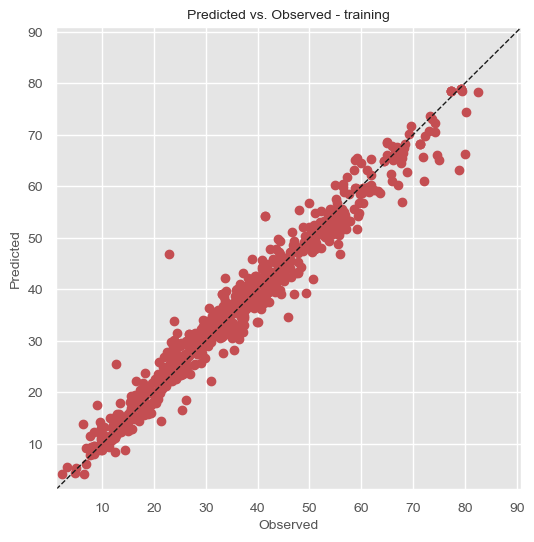

In [822]:
y_pred = model_gbr2.predict(x_train)
dispersion_model(y_train, y_pred,'training')

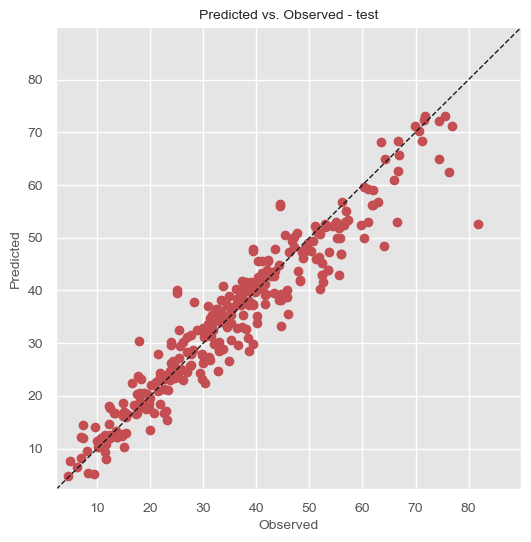

In [801]:
y_pred_test = model_gbr2.predict(x_test)
dispersion_model(y_test, y_pred_test, 'test')

### ANN - Artificial Neural Networks:

In [750]:
import tensorflow as tf 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)
from tensorflow import keras
import tensorflow_addons as tfa
from tensorflow.keras import layers
from scikeras.wrappers import KerasRegressor
from sklearn.preprocessing import StandardScaler

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

Standardizing the scale of variables:

In [751]:
x_scaler = StandardScaler()
x_train_sc = x_scaler.fit_transform(x_train_)
x_valid_sc = x_scaler.transform(x_valid)
x_test_sc = x_scaler.transform(x_test)

y_scaler = StandardScaler()
y_train_sc = y_scaler.fit_transform(y_train_.to_numpy().reshape(-1,1))

Building Tensorflow model encapsulated as Scikit-Learn:

In [752]:
def model_ANN (num_layers=1, num_neurons=8, fn_hid='tanh', fn_out='relu', drop = 0.1):
    
    model = keras.Sequential()
    
    # First hidden layer:
    model.add(layers.Dense(num_neurons, 
                           activation=str(fn_hid),
                           kernel_regularizer=keras.regularizers.l1_l2(),
                           input_shape=(x_train_sc.shape[1],)))
    model.add(layers.Dropout(drop))
    
    # Add more hidden layers:
    if num_layers > 1:
        for i in np.arange(2, num_layers + 1):
            model.add(layers.Dense(num_neurons, 
                                   activation=str(fn_hid),
                                   kernel_regularizer=keras.regularizers.l1_l2()))
            model.add(layers.Dropout(drop))
    
    # Output layer:
    model.add(layers.Dense(1, activation=str(fn_out)))
     
   
    model.compile(loss='mean_squared_error', 
                  optimizer=keras.optimizers.Adam(),
                  metrics=tfa.metrics.RSquare(name='r2', dtype=tf.float32, y_shape=(1,)))
    return model

Definition of the hyperparametric space:

In [753]:
_layers = np.arange(2, 8, 1) 

_neurons = np.power(2, np.arange(3, 6, 1)) 

_fn_hid = ['relu','tanh']

_fn_out = ['relu','linear']

_drop = np.arange(0, 0.15, 0.05).round(decimals=2)

param_grid = dict(num_layers= _layers,
                  num_neurons= _neurons,
                  fn_hid= _fn_hid,
                  fn_out= _fn_out,
                  drop = _drop)

In [754]:
bo_space_ = {'num_layers': hp.choice('num_layers', param_grid['num_layers']),
            'num_neurons': hp.choice('num_neurons', param_grid['num_neurons']),
            'fn_hid': hp.choice('fn_hid', param_grid['fn_hid']),
            'fn_out': hp.choice('fn_out', param_grid['fn_out']),
             'drop': hp.choice('drop', param_grid['drop'])}

Defining the function that will be optimized:
    
Early Stopping (callbacks):

In [755]:
ann_es = keras.callbacks.EarlyStopping(monitor="val_r2",    
                                        min_delta=0.005,
                                        patience = 20,
                                        verbose=1,
                                        mode='max',
                                        restore_best_weights=True)

In [756]:
def bo_naa (param):    

    print ('Hiperparametros testados: ', param)
    model = model_ANN (num_layers=param['num_layers'], 
                          num_neurons=param['num_neurons'],
                          fn_hid=param['fn_hid'],
                           fn_out=param['fn_out'],
                            drop = param['drop']) 

    model.fit(x_train_sc, 
                y_train_sc,
                epochs=100,        
                batch_size=32,       
                validation_split= 0.2,  
                callbacks=[ann_es],        
                verbose=0) 
    
    
    y_pred_train = y_scaler.inverse_transform(model.predict(x_train_sc))
    y_pred_valid = y_scaler.inverse_transform(model.predict(x_valid_sc))
    
    r2_train = r2_score(y_train_, y_pred_train)
    r2_valid = r2_score(y_valid, y_pred_valid)   
    r2_variation = (r2_train - r2_valid)/r2_train
    
    D_r = math.sqrt((r2_valid - 1)**2 + (r2_variation - 0)**2)  
      
                           
    print('r2_train :',r2_train, 'r2_valid :',r2_valid)
    
    return {'loss': D_r,'status': STATUS_OK}

Defining the parameters of the "fmin" optimization function:

In [202]:
trials = Trials()                  
bo_search_3 = fmin(fn= bo_naa,       
                 space= bo_space_,  
                 algo=tpe.suggest, 
                 max_evals=100,     
                 trials=trials)

Hiperparametros testados:                                                                                              
{'drop': 0.1, 'fn_hid': 'tanh', 'fn_out': 'relu', 'num_layers': 3, 'num_neurons': 32}                                  
Restoring model weights from the end of the best epoch.                                                                
Epoch 00035: early stopping                                                                                            
r2_train :                                                                                                             
0.3649389473745722                                                                                                     
r2_valid :                                                                                                             
0.3349054186513374                                                                                                     
Hiperparametros testados:               

Obtaining the best hyperparameters:

In [203]:
bo_better_hp = space_eval(bo_space_, bo_search_3)
print('Better hyperparameters: ', bo_better_hp)

Better hyperparameters:  {'drop': 0.0, 'fn_hid': 'relu', 'fn_out': 'linear', 'num_layers': 6, 'num_neurons': 16}


Fitting the chosen model (best hyperparameters):

In [757]:
model_ann = model_ANN(num_layers = 6,
                      num_neurons= 16,
                      fn_hid= 'relu',
                      fn_out= 'linear',
                        drop=0.00)

historic = model_ann.fit(x_train_sc, 
                        y_train_sc,
                        epochs=200,
                        batch_size=32,
                        validation_split=0.3,
                        callbacks=ann_es,
                        verbose=1)

Epoch 1/200
13/13 [==============================] - 13s 725ms/step - loss: 4.2751 - r2: -0.1400 - val_loss: 4.0502 - val_r2: 0.0673
Epoch 2/200
13/13 [==============================] - 0s 9ms/step - loss: 4.0187 - r2: 0.0382 - val_loss: 3.8710 - val_r2: 0.1154
Epoch 3/200
13/13 [==============================] - 0s 8ms/step - loss: 3.9021 - r2: 0.0757 - val_loss: 3.7072 - val_r2: 0.1491
Epoch 4/200
13/13 [==============================] - 0s 6ms/step - loss: 3.6863 - r2: 0.1318 - val_loss: 3.5297 - val_r2: 0.2013
Epoch 5/200
13/13 [==============================] - 0s 6ms/step - loss: 3.5295 - r2: 0.1877 - val_loss: 3.3358 - val_r2: 0.2775
Epoch 6/200
13/13 [==============================] - 0s 6ms/step - loss: 3.3880 - r2: 0.2605 - val_loss: 3.1506 - val_r2: 0.3503
Epoch 7/200
13/13 [==============================] - 0s 6ms/step - loss: 3.1516 - r2: 0.3101 - val_loss: 2.9891 - val_r2: 0.4050
Epoch 8/200
13/13 [==============================] - 0s 6ms/step - loss: 2.9737 - r2: 0.3926 

In [758]:
list(historic.history.keys())

['loss', 'r2', 'val_loss', 'val_r2']

Building a graph to track the evolution of performance (R²) during training (number of epochs):

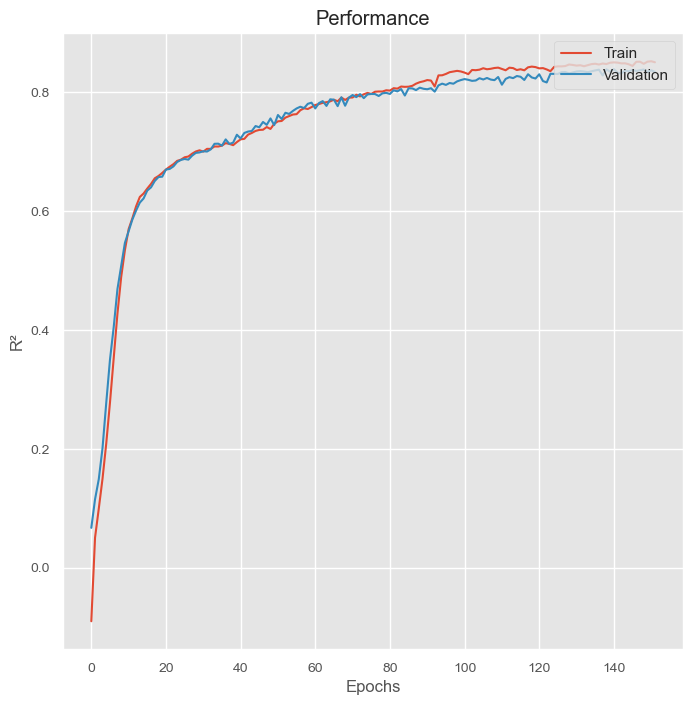

In [759]:
rmse_train = list(historic.history.keys())[1]
rmse_valid = list(historic.history.keys())[3]


fig, ax = plt.subplots(figsize=(8, 8))
plt.plot(historic.history[rmse_train])
plt.plot(historic.history[rmse_valid])
plt.title('Performance')
plt.ylabel('R²')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

Obtaining the performances:

In [764]:
performance_reg (model_ann, x_train_sc, y_train_, x_test_sc, y_test, y_scaler)

,Train,Test,Variation_%
R²,0.85,0.84,-1.18
RMSE,6.48,6.48,0.00


Obtaining scatterplots to compare the predicted target values with the actual target values:

In [765]:
y_train_pred = y_scaler.inverse_transform(model_ann.predict(x_train_sc))
y_test_pred = y_scaler.inverse_transform(model_ann.predict(x_test_sc))

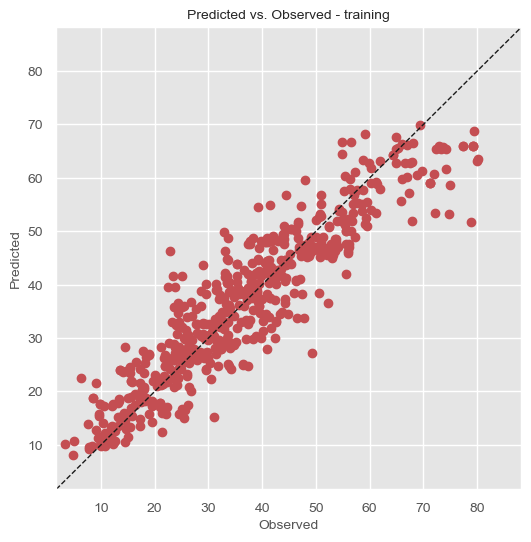

In [823]:
dispersion_model(y_train_, y_train_pred, 'training')

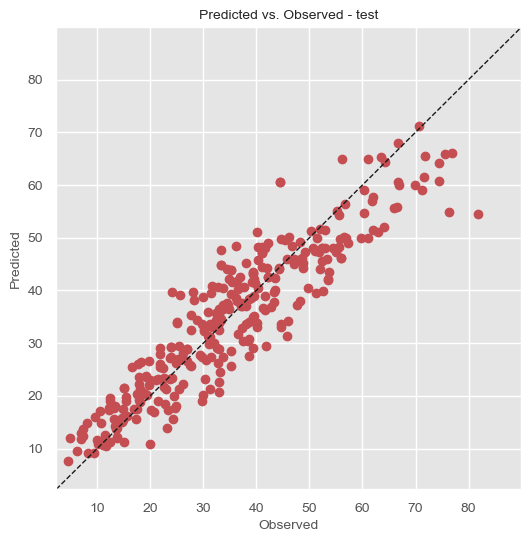

In [805]:
dispersion_model(y_test, y_test_pred, 'test')

### Observations and conclusions about the performances of the models obtained:
    
Although the Aritifical Neural Networks (ANN) model presented better generalization than the Gradient Boosting model, the latter presented considerably better performance. A coefficient of determination (R²) value of 0.91 and an RMSE value of 4.87 were obtained in the test set, while in the ANN model these values ​​were 0.84 and 7.48, respectively. 

These differences in performance can be easily seen in the scatterplots below. The target values ​​predicted by the Gradient Boosting model are much more concentrated and closer to the central line (predicted y = real y) than the values ​​predicted by the ANN model.

Therefore, we conclude that the use of the Gradient Boosting model is more advantageous.

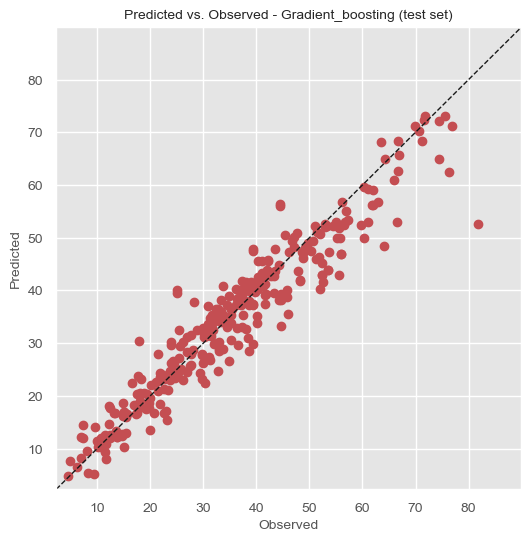

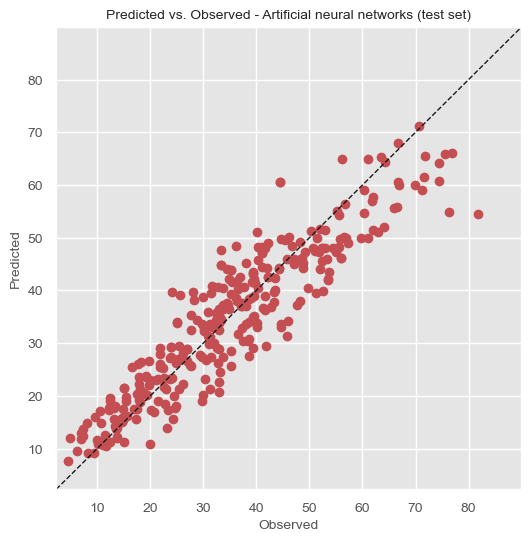

In [824]:
dispersion_model(y_test, y_pred_test, 'Gradient_boosting (test set)')

dispersion_model(y_test, y_test_pred, 'Artificial neural networks (test set)')

## Interpreting the chosen model: 

SHAP (SHapley Additive exPlanations) values are used to explain predictions from machine learning models. 

Positive SHAP Value: Indicates that the feature increases the model's prediction in relation to the base value (or expected value).

Negative SHAP Value: Indicates that the feature reduces the model's prediction in relation to the base value.

In [809]:
import shap

Getting the SHAP values:

In [810]:
explainer = shap.TreeExplainer(model=model_gbr2, 
                                data= x_train)

shap_values = explainer.shap_values(X= x_train)

In [811]:
feat_lst = x_train.columns.to_list()

### Obtaining the most important variables (for the prediction model):

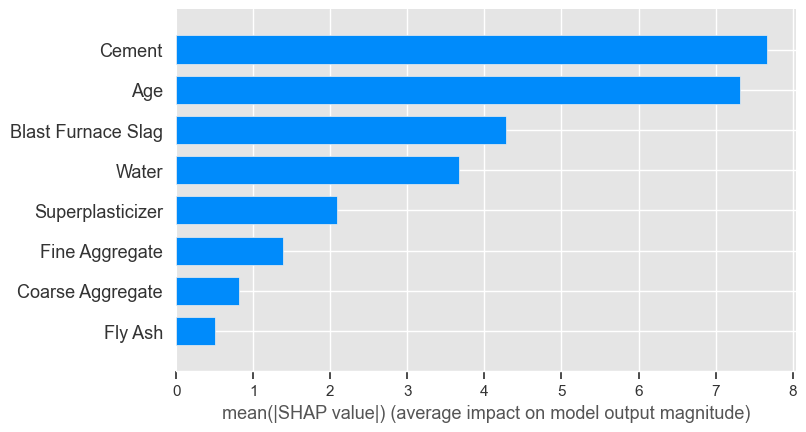

In [812]:
shap.summary_plot(shap_values= shap_values,
                  plot_type='bar',
                  feature_names= feat_lst)

Through the graph above, we observe that the features with the greatest impact on the compressive strength value are the "Cement" and the "Age".

The "Blast Furnace Slag" and "Water" features have a medium impact, while the other features have a weaker impact.

For an individual sample, the sum of the SHAP values of all features is equal to the difference between the value estimated by the model for that sample and the "expected value (base value)". The “expected value” is the mean compressive strength considering all values estimated by the prediction model.

Value estimated by the model = Expected value + sum (SHAP values of the features)

"The expected value" (mean value):

In [813]:
round(explainer.expected_value,2)

39.98

### Checking the magnitude of the impact of each variable:

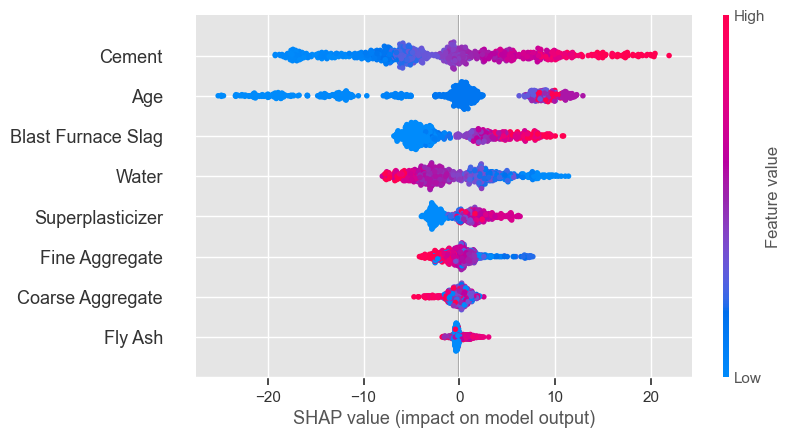

In [814]:
shap.summary_plot(shap_values= shap_values, 
                  features= x_train,
                  feature_names= feat_lst,
                  plot_type='dot')

**Interpreting the graph above:**

The features "Cement", "Age", "Blast Furnace Slag" and "Superplasticizer" have a positive impact, that is, the higher the value of these features, the higher the SHAP value.
The opposite is observed for the features "Water" and "Fine Aggregate". The lower the value of these features, the higher the SHAP value.

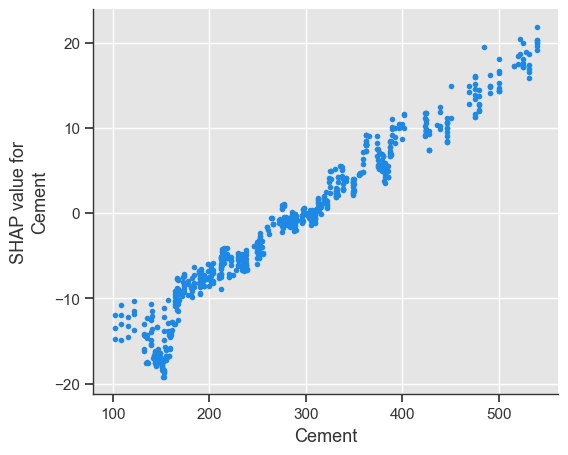

In [815]:
shap.dependence_plot(ind='Cement', 
                     shap_values= shap_values, 
                     features= x_train,
                     feature_names= feat_lst, 
                     interaction_index= None)

**Interpreting the graph above:**

The impact of the "Cement" feature on SHAP values ​​varies between -20 and 22. Values between 300 and 500 kg/m³ of cement have a positive impact. Values below 300 kg/m³ of cement have a negative impact.

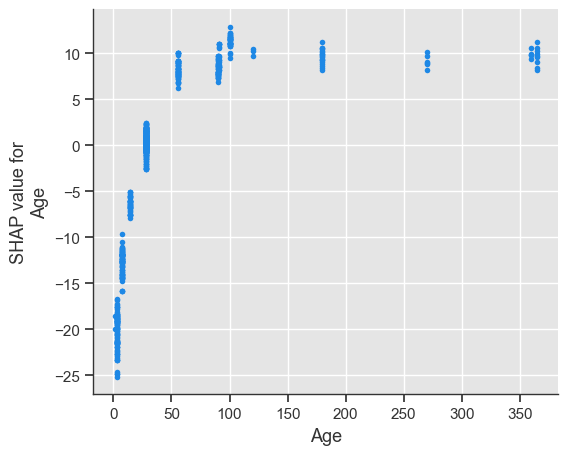

In [816]:
shap.dependence_plot(ind='Age', 
                     shap_values= shap_values, 
                     features= x_train,
                     feature_names= feat_lst, 
                     interaction_index= None)

**Interpreting the graph above:**

The impact of the "Age" feature on SHAP values varies between -25 and 13. Ages above 50 days have a positive impact.
The biggest impact on SHAP value occurs in 100 days.

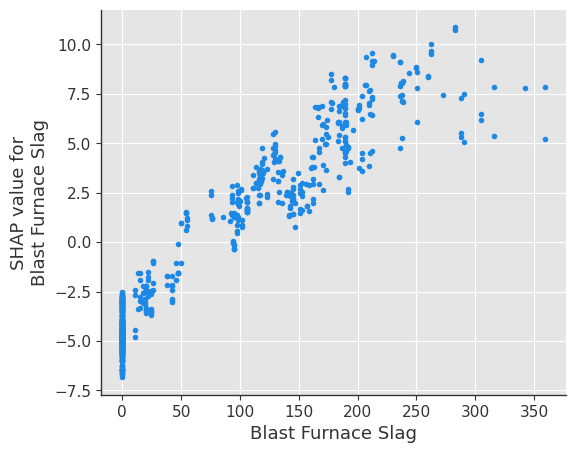

In [309]:
shap.dependence_plot(ind='Blast Furnace Slag', 
                     shap_values= shap_values, 
                     features= x_train,
                     feature_names= feat_lst, 
                     interaction_index= None)

**Interpreting the graph above:**

The impact of the "Blast Furnace Slag" feature on SHAP values varies between -7.5 and 11. Values ​​between 50 and 350 kg/m³ have a positive impact. Values below 50 kg/m³ have a negative impact.

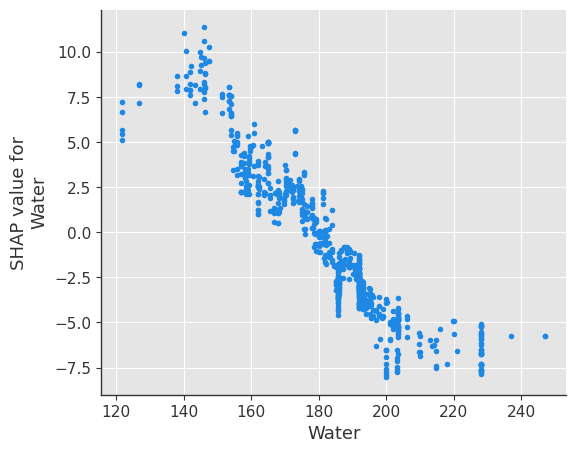

In [310]:
shap.dependence_plot(ind='Water', 
                     shap_values= shap_values, 
                     features= x_train,
                     feature_names= feat_lst, 
                     interaction_index= None)

**Interpreting the graph above:**

The impact of the "Water" feature on SHAP values varies between -9 and 11. Values between 120 and 175 kg/m³ have a positive impact. Values above 185 kg/m³ have a negative impact.

### Predicting the value of the target variable for specific individual observations:

In [818]:
sample = x_train.to_numpy()

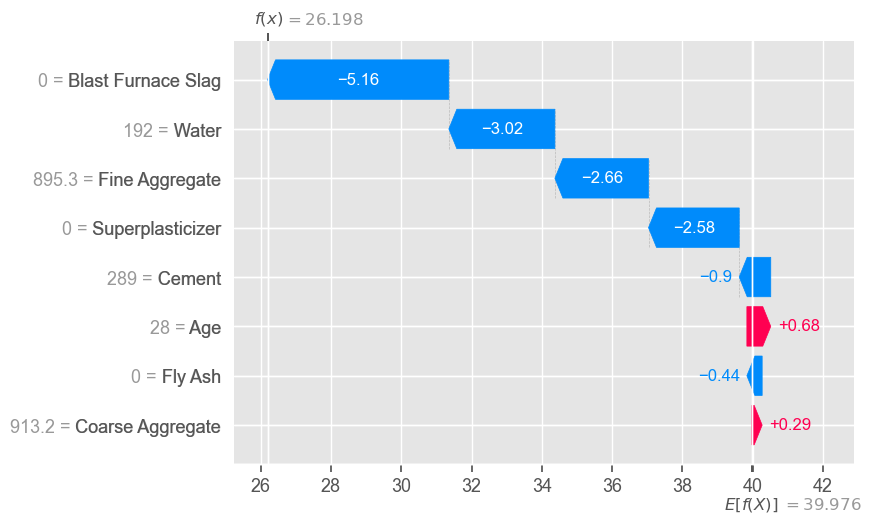

In [819]:
id_obs = 10

shap.plots._waterfall.waterfall_legacy(expected_value= explainer.expected_value,
                                       shap_values= shap_values[id_obs],
                                       feature_names= feat_lst, 
                                       features= sample[id_obs])

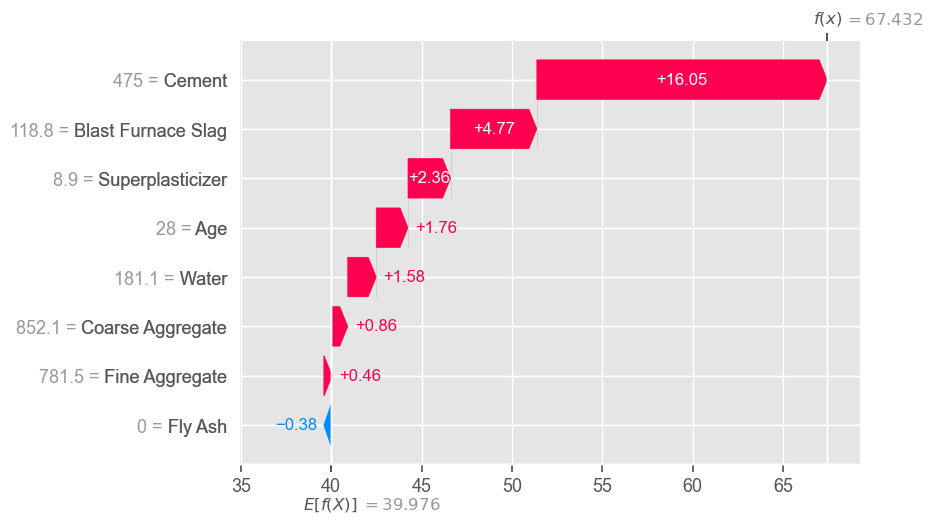

In [820]:
id_obs = 719

shap.plots._waterfall.waterfall_legacy(expected_value= explainer.expected_value,
                                       shap_values= shap_values[id_obs],
                                       feature_names= feat_lst, 
                                       features= sample[id_obs])